# Project:Investigating TMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The Dataset selected for analysis, is a collection of about 10,000 records, of movies from the website "The Movies Database. the dataset includes data pertaining to movie's cast director, title, genre, production comapnies, and so on.

I plan to explore the following questions

**Question 1**
What is the relationship between a movie's budget and it's revenue. find top 10 budget and compare that to its profit, find least 10 in terms of budget and compare that to their profit, find the distribution of budget and revenue of the sample population 

**Question 2**
What is the effect of having more than one production company on the movie's revenue. find revenue per production company

**Question 3**
what are the most successful movies in the dataset. where success is measured by means of votes, popularity, and revenue.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Inspecting Data for instances of missing or possibly errant data
print('**Shape**')
print('{}'.format(df.shape))
print('**Information**')
print('{}'.format(df.info()))
print('**Duplicate count**')
print('{}'.format(df.duplicated().sum()))
print('**Nulls**')
print('{}'.format(df.isnull().sum().sum()))

**Shape**
(10866, 21)
**Information**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-n

From the previous exploration we can conclude that the following columns are irelevant to the analysis and shall be dropped,
imdb_id, budget (due to the presence of budget_adj), revenue (due to the presence of revenue_adj), homepage, tagline, overview.
also there is a single duplicate value that shall be removed.
release date is string and should be converted to date.
further investigation shall be performed after performing the fore mentioned.
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [4]:
# First step in cleaning the data is making a copy of the dataframe, so as to be able to return to the origianl dataset
df_clean = df.copy()
# Droping Duplicate Records
df_clean.drop_duplicates(inplace=True)
# Droping Irrelevenat columns, from the point of view of the posed questions.
df_clean.drop(['imdb_id','budget', 'revenue', 'homepage', 'tagline', 'overview'], axis=1, inplace=True)
# Changing Release Date from a String to Datetime.
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'])
df_clean.dropna(inplace=True)

# ensure year of datetime is equal to release year 
#(since years before 2000 can be interpreted as after 2000)
release_date_index =  df_clean.columns.get_loc('release_date')
release_year_index =  df_clean.columns.get_loc('release_year')

for index in range(len(df_clean)):    
    df_clean.iloc[index,release_date_index] = df_clean.iloc[index,release_date_index].replace(year=df_clean.iloc[index,release_year_index])    

In [5]:
# rerun exploration, to ensure our cleaning activities concluded correctly.
print('**Shape**')
print('{}'.format(df_clean.shape))
print('**Information**')
print('{}'.format(df_clean.info()))
print('**Duplicate count**')
print('{}'.format(df_clean.duplicated().sum()))
print('**Nulls**')
print('{}'.format(df_clean.isnull().sum().sum()))

**Shape**
(8666, 15)
**Information**
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8666 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    8666 non-null   int64         
 1   popularity            8666 non-null   float64       
 2   original_title        8666 non-null   object        
 3   cast                  8666 non-null   object        
 4   director              8666 non-null   object        
 5   keywords              8666 non-null   object        
 6   runtime               8666 non-null   int64         
 7   genres                8666 non-null   object        
 8   production_companies  8666 non-null   object        
 9   release_date          8666 non-null   datetime64[ns]
 10  vote_count            8666 non-null   int64         
 11  vote_average          8666 non-null   float64       
 12  release_year          8666 non-null   

In [6]:
# exploring the data further.
df_clean.tail()

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,0.080598,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,1966-06-15,11,7.4,1966,0.000000,0.0
10862,20379,0.065543,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,1966-12-21,20,5.7,1966,0.000000,0.0
10863,39768,0.065141,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1966-01-01,11,6.5,1966,0.000000,0.0
10864,21449,0.064317,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,1966-11-02,22,5.4,1966,0.000000,0.0
10865,22293,0.035919,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,fire|gun|drive|sacrifice|flashlight,74,Horror,Norm-Iris,1966-11-15,15,1.5,1966,127642.279154,0.0


In [7]:
# since we are exploring movies based on revenue, and budget rows where those values are 0 are not useful,
# and should be removed.
df_with_budget = df_clean[df_clean.budget_adj != 0]
df_with_budget_revenue = df_with_budget[df_with_budget.revenue_adj != 0]
df_with_budget_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3677 non-null   int64         
 1   popularity            3677 non-null   float64       
 2   original_title        3677 non-null   object        
 3   cast                  3677 non-null   object        
 4   director              3677 non-null   object        
 5   keywords              3677 non-null   object        
 6   runtime               3677 non-null   int64         
 7   genres                3677 non-null   object        
 8   production_companies  3677 non-null   object        
 9   release_date          3677 non-null   datetime64[ns]
 10  vote_count            3677 non-null   int64         
 11  vote_average          3677 non-null   float64       
 12  release_year          3677 non-null   int64         
 13  budget_adj       

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 relation between budget (Indenpendent Variable) and revenue (dependent variable)
What is the relationship between a movie's budget and it's revenue. find top 10 budget and compare that to its profit, find least 10 in terms of budget and compare that to their profit, find the distribution of budget and revenue of the sample population 

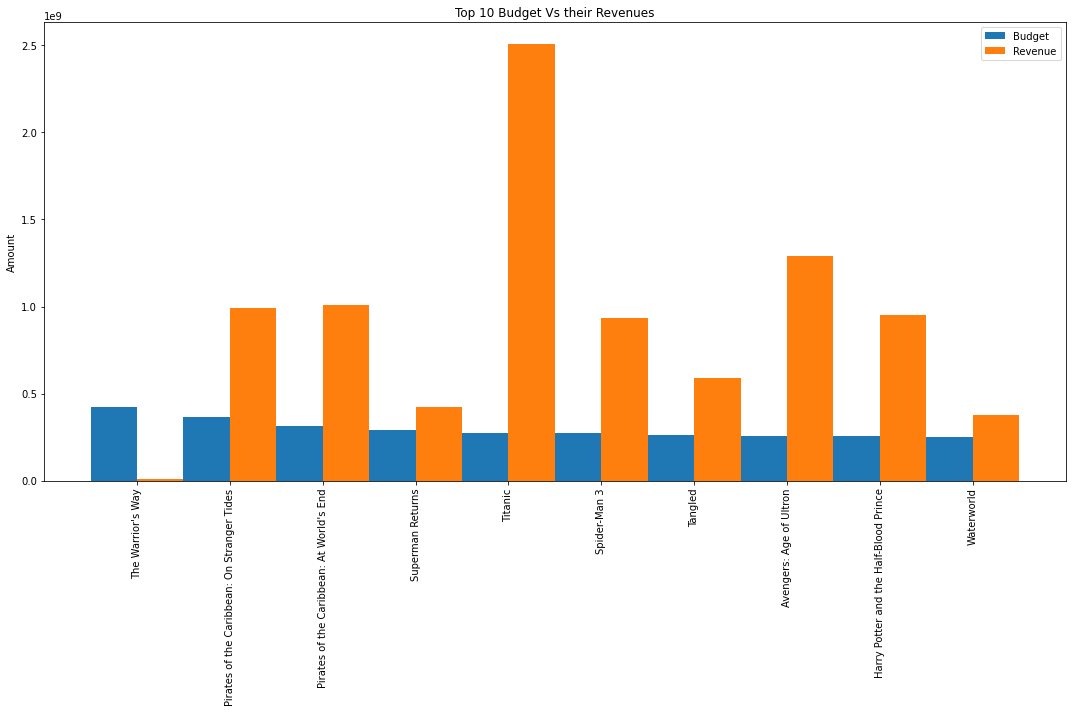

Top 10 Movies descending, in term of budget:
 ["The Warrior's Way", 'Pirates of the Caribbean: On Stranger Tides', "Pirates of the Caribbean: At World's End", 'Superman Returns', 'Titanic', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Waterworld']


In [8]:
labels = df_with_budget_revenue.sort_values(by=['budget_adj'], ascending=False).head(10)['original_title'].tolist()
budget = df_with_budget_revenue.sort_values(by=['budget_adj'],ascending=False).head(10)['budget_adj'].tolist()
revenue = df_with_budget_revenue.sort_values(by=['budget_adj'],ascending=False).head(10)['revenue_adj'].tolist()

x = np.arange(len(labels))
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x - width/2, budget, width, label='Budget')
rects2 = ax.bar(x + width/2, revenue, width, label='Revenue')

ax.set_ylabel('Amount')
ax.set_title('Top 10 Budget Vs their Revenues')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

fig.tight_layout()
plt.show()
print('Top 10 Movies descending, in term of budget:\n {}'.format(labels))

- From the Previous Graph we can clearly deduce that budget is not the only variable affecting revenue, since the highest revenue in the Top 10 Budget moviews was # 5.
- We could ask if budget has any relation with revenue, by means of finding the top 10 movies in term of revenue and finding out how many of them are in the top 10 movies in terms of budget.

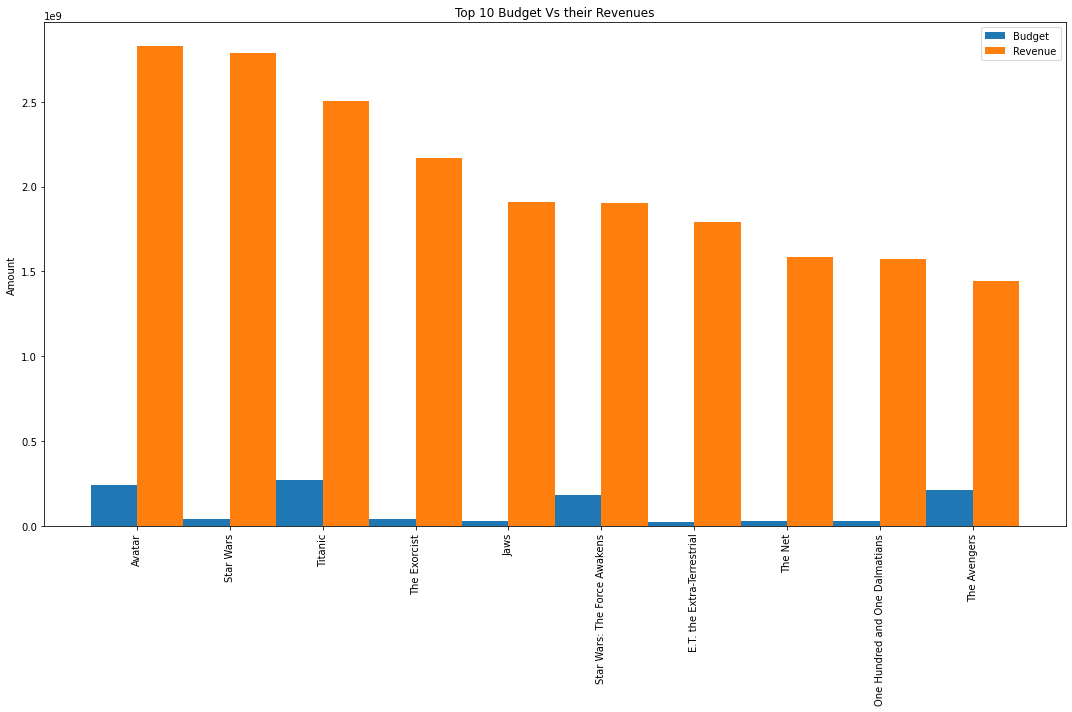

Top 10 Movies descending, in term of revenue:
 ['Avatar', 'Star Wars', 'Titanic', 'The Exorcist', 'Jaws', 'Star Wars: The Force Awakens', 'E.T. the Extra-Terrestrial', 'The Net', 'One Hundred and One Dalmatians', 'The Avengers']


In [9]:
labels = df_with_budget_revenue.sort_values(by=['revenue_adj'], ascending=False).head(10)['original_title'].tolist()
budget = df_with_budget_revenue.sort_values(by=['revenue_adj'],ascending=False).head(10)['budget_adj'].tolist()
revenue = df_with_budget_revenue.sort_values(by=['revenue_adj'],ascending=False).head(10)['revenue_adj'].tolist()

x = np.arange(len(labels))
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x - width/2, budget, width, label='Budget')
rects2 = ax.bar(x + width/2, revenue, width, label='Revenue')

ax.set_ylabel('Amount')
ax.set_title('Top 10 Budget Vs their Revenues')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

fig.tight_layout()
plt.show()
print('Top 10 Movies descending, in term of revenue:\n {}'.format(labels))

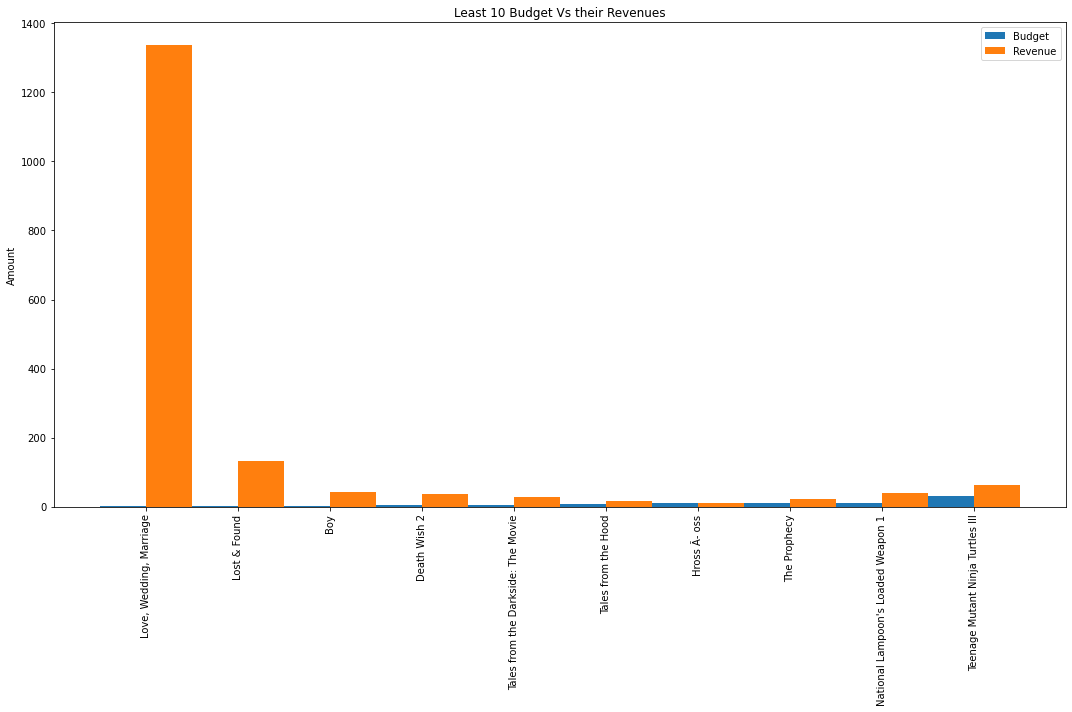

Top 10 Movies ascending, in term of budget:
 ['Love, Wedding, Marriage', 'Lost & Found', 'Boy', 'Death Wish 2', 'Tales from the Darkside: The Movie', 'Tales from the Hood', 'Hross Ã\xad oss', 'The Prophecy', "National Lampoon's Loaded Weapon 1", 'Teenage Mutant Ninja Turtles III']


In [10]:
# ensuring our findings so far are correct we look at the least 10 movies in terms of budget, and check their revenues
labels = df_with_budget_revenue.sort_values(by=['budget_adj'], ascending=True).head(10)['original_title'].tolist()
budget = df_with_budget_revenue.sort_values(by=['budget_adj'],ascending=True).head(10)['budget_adj'].tolist()
revenue = df_with_budget_revenue.sort_values(by=['budget_adj'],ascending=True).head(10)['revenue_adj'].tolist()

x = np.arange(len(labels))
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x - width/2, budget, width, label='Budget')
rects2 = ax.bar(x + width/2, revenue, width, label='Revenue')

ax.set_ylabel('Amount')
ax.set_title('Least 10 Budget Vs their Revenues')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 90)
ax.legend()

fig.tight_layout()
plt.show()
print('Top 10 Movies ascending, in term of budget:\n {}'.format(labels))

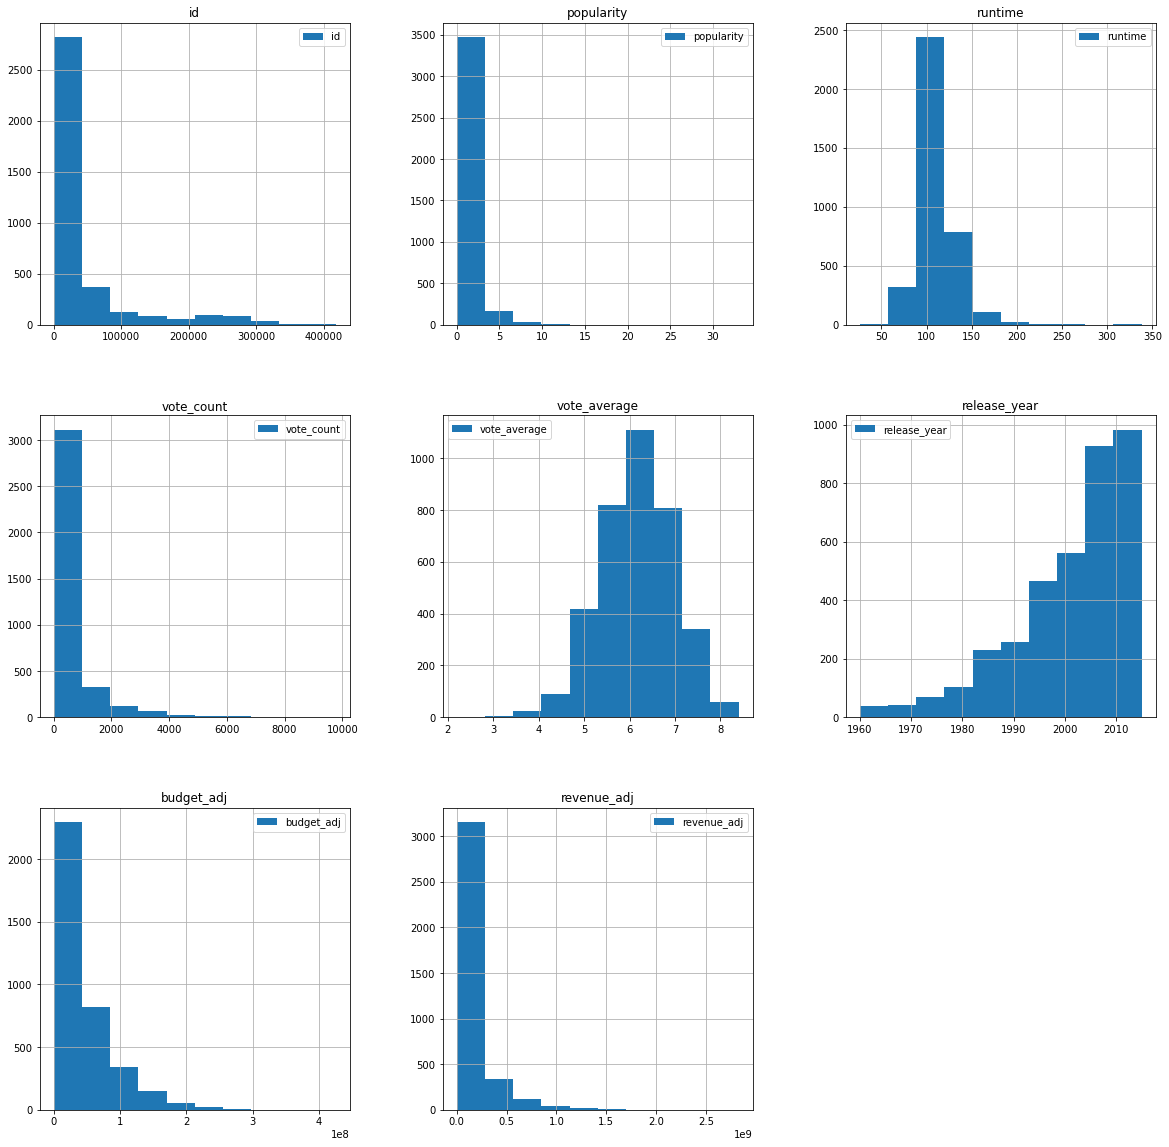

In [11]:
# finally and before concluding the relationship between budget and revenue, we graph the histogram of the data
# to check the distribution

df_with_budget_revenue.hist(figsize=(20,20), legend=True);

### Conclusion to research question 1

Only a single movie appears in both highest 10 movies in term of budget and revenue, that is Titanic. the distribution for budget and revenue are both right skewed.
Therefore it is clear that the cause and effect relationship between budget and revenue is very week, infact non existent.

if we were to continue exploring independent variables that affect revenue, I would propose director and genre.

### Research Question 2 effect of number of movie production companies on revenue.
having multiple production companies could be a sign of pooling resources to contribute to production. therefore this question looks at exploring the effect of the number of production companies to a movie revenue. and does having multiple production companies makes the movie production process harder to manage, resulting in less success (where success is currently being measured by means of highest revenue)

In [12]:
df_current = df_with_budget_revenue.copy()
production_companies_index =  df_clean.columns.get_loc('production_companies')
company_count = []
for index in range(len(df_with_budget_revenue)):
     company_count.append(df_with_budget_revenue.iloc[index,production_companies_index].count('|')+1)
df_current['p_company_count'] = np.asarray(company_count)
pd.options.display.max_colwidth = 100
print('{} - {}'.format(df_current.head()['production_companies'].values, df_current.head()['p_company_count'].values))

['Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu'
 'Village Roadshow Pictures|Kennedy Miller Productions'
 'Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel'
 'Lucasfilm|Truenorth Productions|Bad Robot'
 'Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films'] - [5 2 4 3 5]


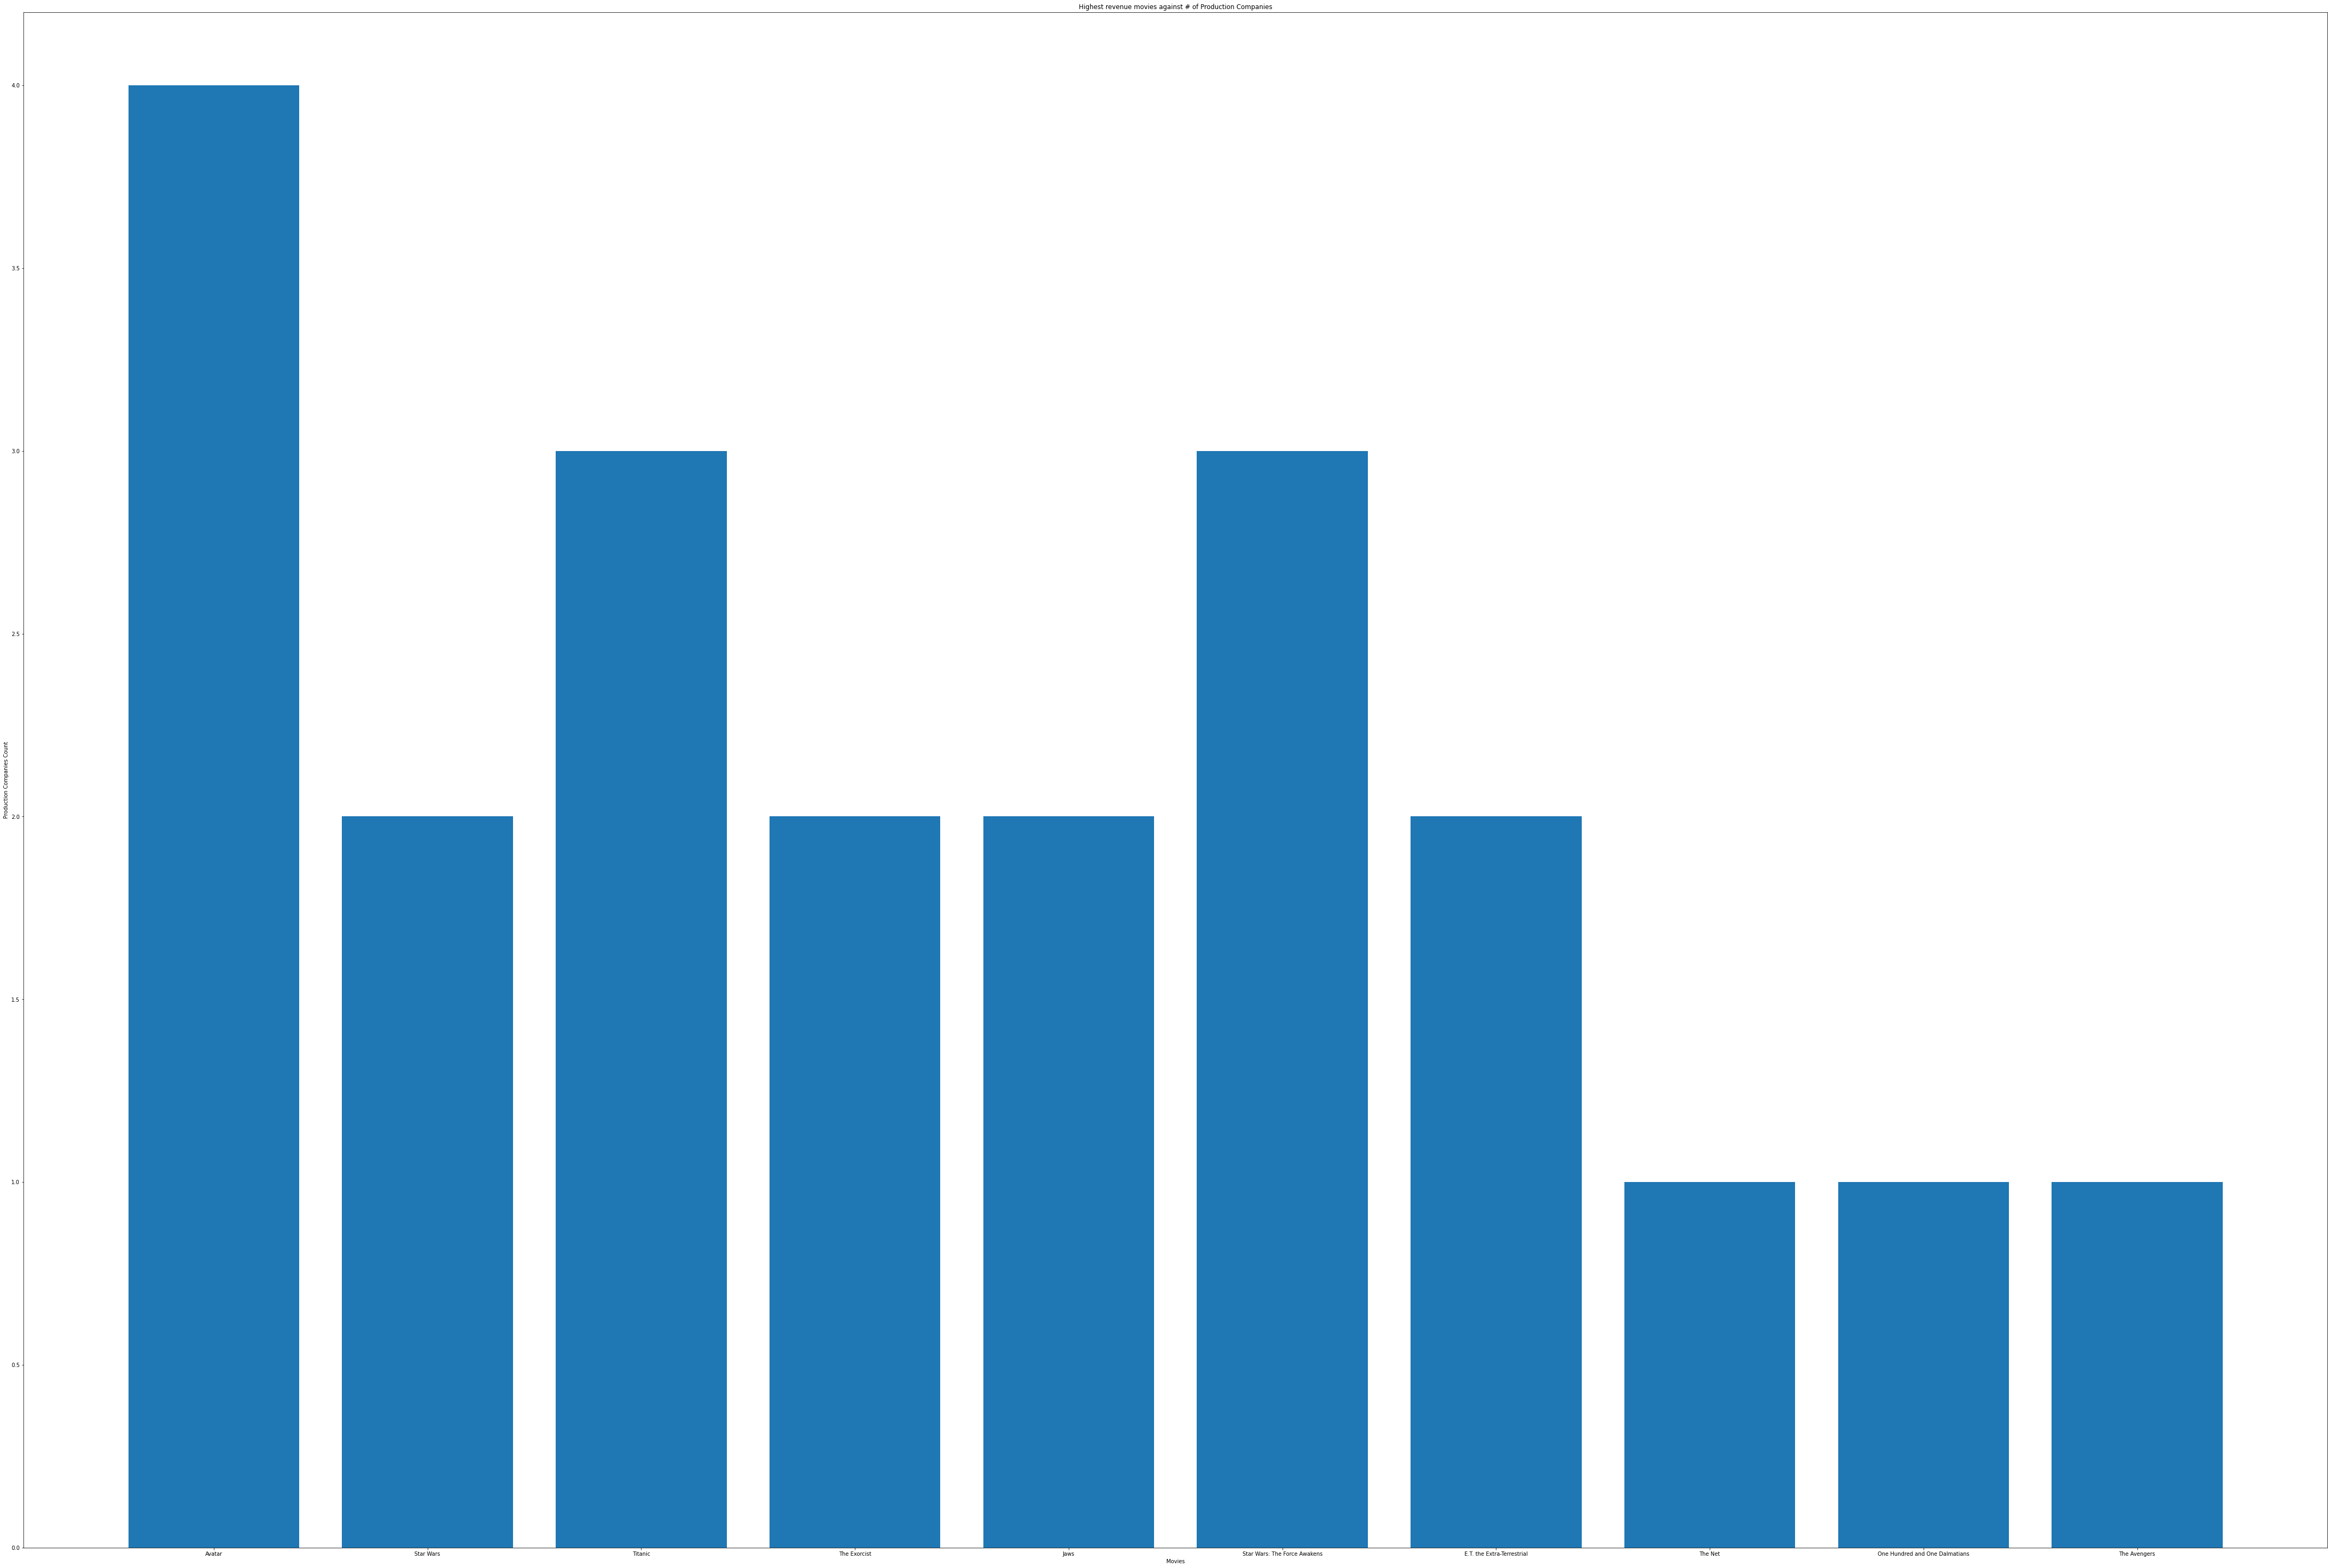

In [13]:
# Plotting highest revenue movies against the number of their production companies.
movies = df_current.sort_values(by=['revenue_adj'],ascending=False).head(10)['original_title'].tolist()
p_count = df_current.sort_values(by=['revenue_adj'],ascending=False).head(10)['p_company_count'].tolist()
fig = plt.figure()
ax = fig.add_axes([0,0,10,10], xlabel = 'Movies', ylabel='Production Companies Count', title='Highest revenue movies against # of Production Companies')
ax.bar(movies,p_count)
plt.show()

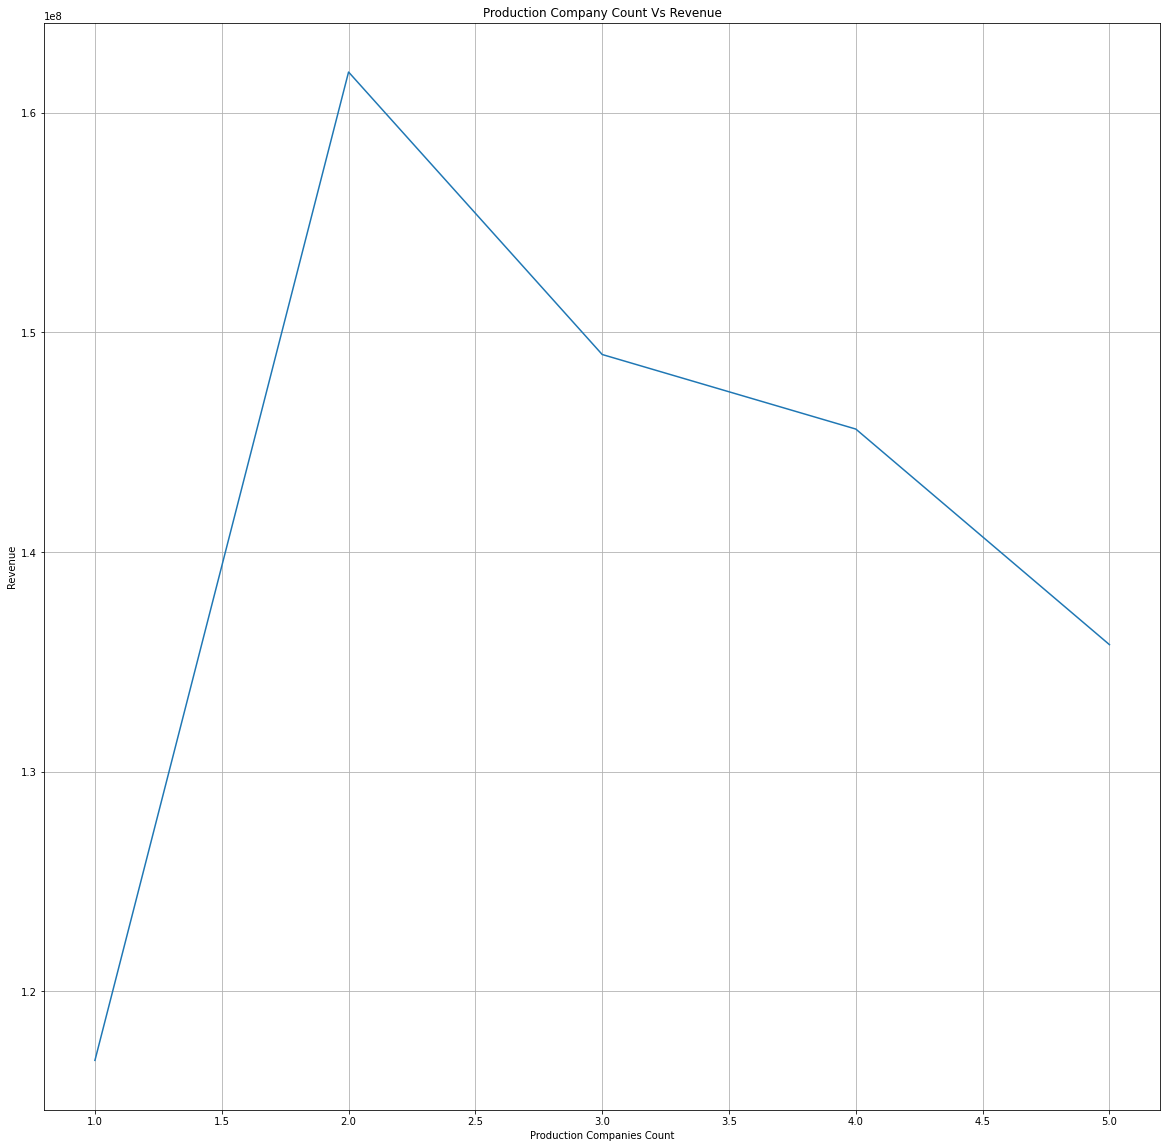

In [14]:
# From the Above Graph there is a clear relationship between the number of studios, and the revenue generated.
# however their seems to be a pattern of a certain value being dominant. in order to find that out, we group
# the data by count of production companies and replot

df_current.groupby(['p_company_count'])['revenue_adj'].mean().plot(grid=True, figsize=(20,20), title ='Production Company Count Vs Revenue', xlabel='Production Companies Count',ylabel='Revenue');

### Conclusion to Research Question 2

There is a cause and effect relationship between the number of production companies, and revenue, and it would seam, that the most profitable movies are those with 2 production companies, which implies that the more production companies involved production processes tend to be too complex to achieve a profitable end product, while the pooling of resources of 2 production companies results in higher revenues.

### Research Question 3:  what are the most successful movies in the dataset. where success is measured by means of votes, popularity, and revenue.

in this question we shall, first sort movies by their popularity to find the top 10 movies in terms of popularity, and then find the highest (also top 10) rated movies, find the intersection between the two groups, and exmain the revenues vs budget for said group 

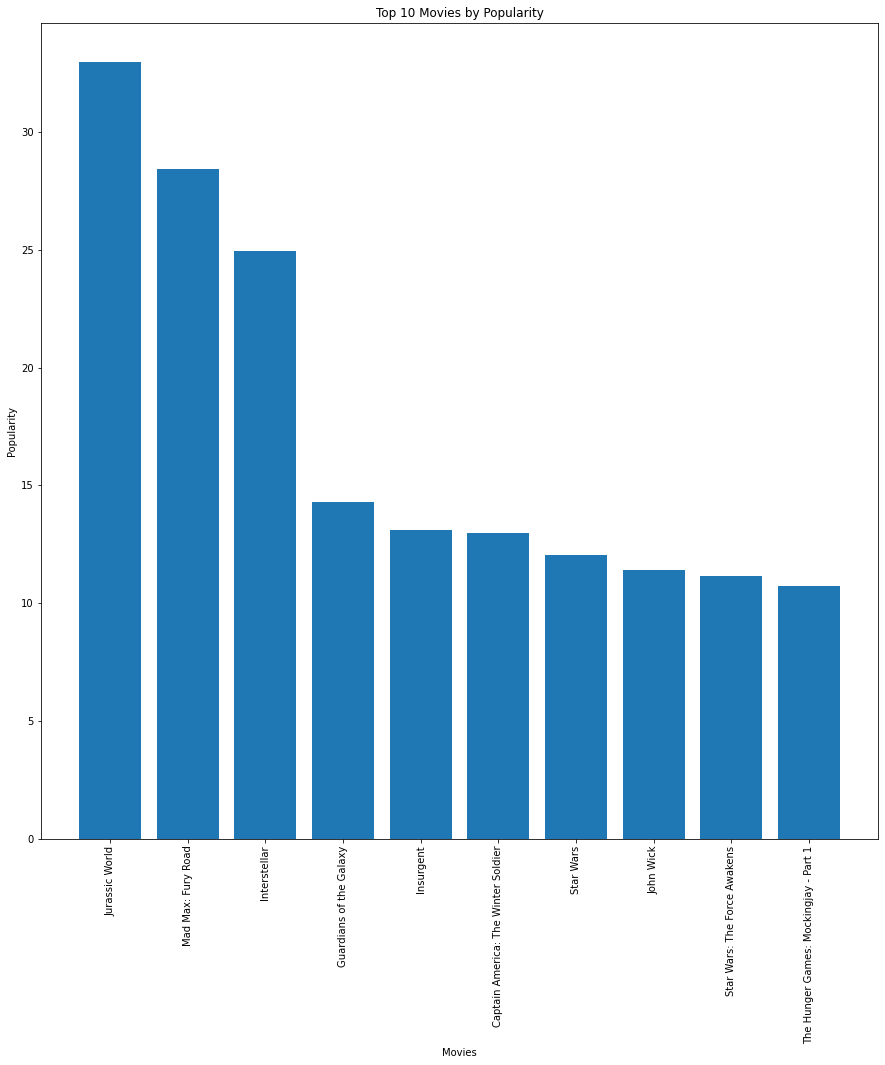

In [15]:
list_popularity = df_current.sort_values(by=['popularity'],ascending=False).head(10)['original_title'].tolist()
y_pos = np.arange(len(list_popularity))
list_popularity_y = df_current.sort_values(by=['popularity'],ascending=False).head(10)['popularity'].tolist()

plt.figure(figsize=(15,15))
plt.bar(y_pos, list_popularity_y, align='center', alpha=1)
plt.xticks(y_pos, list_popularity,rotation=90)
plt.xlabel('Movies')
plt.ylabel('Popularity')
plt.title('Top 10 Movies by Popularity')

plt.show()

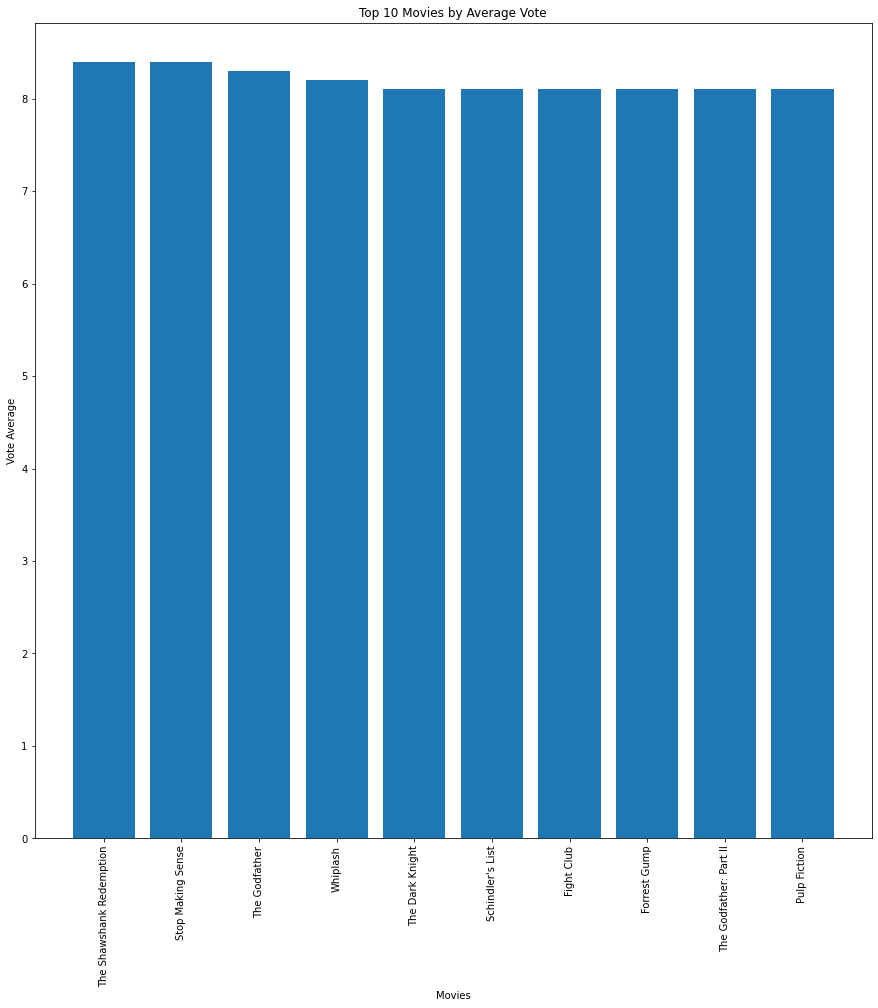

In [16]:
list_vote = df_current.sort_values(by=['vote_average'],ascending=False).head(10)['original_title'].tolist()
y_pos = np.arange(len(list_popularity))
list_vote_y = df_current.sort_values(by=['vote_average'],ascending=False).head(10)['vote_average'].tolist()

plt.figure(figsize=(15,15))
plt.bar(y_pos, list_vote_y, align='center', alpha=1)
plt.xticks(y_pos, list_vote,rotation=90)
plt.xlabel('Movies')
plt.ylabel('Vote Average')
plt.title('Top 10 Movies by Average Vote')

plt.show()

### Question 3 Conclusion
Question Three investigated two independent variables, which are the top 10 movies one from the point of view of the popularity value calculated by TMDB, and the vote average receveid by users. the graphs show the distinct difference between the two values. and the fact that people interest in a movie does not mean that inrerest gets converted into a vote.

<a id='conclusions'></a>
## Conclusions

In Conclusion, the dataset of movies sourced from TMDB is fairly clean, after cleaning the data further with the intent to investigate the effect of budget and number of production companies on revenues,
Which is data relevant to a movie producer, it was concluded that budget has very little effect on the profit generated from a movie.

On the other hand, the number of production companies involved in a movie, did show an effect on revenue, or rather the movie production process which either leads to a successful movie (revenue wise) or a failure (also revenue wise)
The analysis shows a 'sweet spot' of two production companies, which implies that multiple production companies working together help share the burden and risk of the movie production process, however as the number of partners (production companies increase) the management of the production process is not as efficient as possible, leading to less revenues.

Finally, the analysis looked at the top 10 movies. from the viewpoint of the website TMDB, using their popularity index, which is a value assigned to each movie based on the interest shown towards said movie by the site visitors, such as adding the movie to the user watch list, and the average votes received by each movie, which is a more direct measure of what viewers though of the movie.
The results are very different, indicating that users who are interested in a movie in the TMDB user base did not care to vote.


## Limitations

the main question of my analysis revolves around revenue, and what factors affect a movie's revenue.
therefore our objective is to find a cause and effect relationship between a number of variables and revenue.

the variable I attempted to explore is budget, which was shown to have no effect on revenue.
with other variables expeted to affect revenue such as director, cast, and production comapnies.

the first observed limitation is how the data lumps together parameters such as Cast members, thus only giving us the ability to compare the number of cast members to revenue, and not particular members (movie stars) and their effect on revenue.

the second observed limitation is how the data lumps together another important parameter, that is production companies. therefore we are unable to attribute revenue to a specific production company.

We did however use the number of production comapnies to show it's effect on revenue by investigating if their is a certain number of production comapnies involved leading to higher revenue (which was found to be 2 companies). yet we can't identify the best production comapnies revenue wise.

furthermore, the adjusted data (for revenue, and budget) contains a large number of 0's which affects the quality of the investigation.

As well as the fact that the adjusted data considers 2010 as the adjustment year, which the data set includes data from 2015. also affecting the quality of the investigation.